In [1]:
from typing import Tuple, List
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random as rand

from node import Node
from heap import MinHeap
from randomised_set import RandomisedSet

In [9]:
class Graph:
    """
    An undirected and connected graph data structure storing uniquely indexed nodes with weighted edges.

    Notes:
        Class attributes can only be accessed by class methods.

    Attributes:
        G: An instance of the Graph class of the networkx module.
        unconnected_edges: An instance of the RandomisedSet class storing all unconnected edges.
        node_map: A hashmap mapping the index of the node to its Node object.
        node_idx_count: An integer count for indexing new nodes.
        num_nodes: The total number of nodes in the graph.
        num_edges: The total number of edges in the graph.
        starting_node: An integer index of the starting node defined by the user.
        ending_node: An integer index of the ending node defined by the user.

    Methods:
        generate_random_nodes: Generate a random number of nodes.
        generate_random_edges: Generate a random number of weighted edges.
        set_starting_node: A setter method for the starting node.
        set_ending_node: A setter method for the ending node.
        add_edge: Add an edge with random weight to the graph.
        delete_edge: Delete an edge from the graph.
        shortest_path: Find the shortest path between 2 nodes.
    """

    def __init__(self,
                 init_num_nodes: int = 0,
                 init_num_edges: int = 0) -> None:
        """
        Construct all attributes of the graph data structure.

        Args:
            init_num_nodes: Number of randomly generated nodes during initialization.
            init_num_edges: Number of randomly generated edges during initialization.

        Raises:
            TypeError: Errors caused by incompatible data types of input parameters 'init_num_nodes' and 'init_num_edges'.
            ValueError: Errors caused by invalid range inputs of parameters 'init_num_nodes' and 'init_num_edges'.
        """
        if (not isinstance(init_num_nodes, int) or 
            not isinstance(init_num_edges, int)):
            raise TypeError("Input parameters 'init_num_nodes' and 'init_num_edges' must be integers")
        
        if min(init_num_nodes, init_num_edges) < 0:
            raise ValueError("Input parameters 'init_num_nodes' and 'init_num_edges' must be non-negative")

        self.G = nx.Graph()
        self.unconnected_edges = RandomisedSet()
        self.node_map = {}
        self.node_idx_count = 1
        self.num_nodes = 0
        self.num_edges = 0
        self.starting_node = None
        self.ending_node = None

        self.generate_random_nodes(init_num_nodes)
        self.__randomly_connect_all_nodes()
        self.generate_random_edges(init_num_edges)

    def generate_random_nodes(self, 
                              num: int = 0,
                              low: int = 10,
                              high: int = 15) -> None:
        """
        Generate a random number of nodes in the graph.

        Args:
            num: An integer representing the fixed number of nodes to be generated (optional).
            low: The minimum number of nodes generated by the method (default = 10).
            high: The minimum number of nodes generated by the method (default = 15).

        Raises:
            TypeError: Errors caused by non-integer parameters input.
            ValueError: Errors caused by non-negative parameters input or the invalid ranges of 'low' and 'high'.
        """
        # Check data type of input parameters
        if not all([isinstance(num, int),
                   isinstance(low, int),
                   isinstance(high, int)]):
            raise TypeError("All input parameters must be integers")
    
        # Check values of input parameters
        if min(num, low, high) < 0:
            raise ValueError("All input parameters must be non-negative")
        if low > high:
            raise ValueError("Input parameter 'high' must be equal or larger than 'low'")
        
        # Generate random num of nodes if the user does not define a fixed num
        if num == 0:
            num = rand.randint(low, high)
        self.num_nodes += num

        # Generate nodes
        while num:
            self.node_map[self.node_idx_count] = Node(self.node_idx_count)
            self.G.add_node(self.node_idx_count)

            node_indices = list(self.node_map.keys())
            self.unconnected_edges.add_edges_from_node(self.node_idx_count, node_indices)

            self.node_idx_count += 1
            num -= 1

    def generate_random_edges(self,
                              num: int = 0,
                              low: int = 5,
                              high: int = 10) -> None:
        """
        Generate a random number of edges in the graph.

        Args:
            num: An integer representing the fixed number of edges to be generated (optional).
            low: The minimum number of edges generated by the method (default = 5).
            high: The minimum number of edges generated by the method (default = 10).

        Raises:
            TypeError: Errors caused by non-integer parameters input.
            ValueError: Errors caused by non-negative parameters input or the invalid ranges of 'low' and 'high'.
        """
        # Check data type of input parameters
        if not all([isinstance(num, int),
                   isinstance(low, int),
                   isinstance(high, int)]):
            raise TypeError("All input parameters must be integers")
    
        # Check value ranges of input parameters
        if min(num, low, high) < 0:
            raise ValueError("All input parameters must be non-negative")
        if low > high:
            raise ValueError("Input parameter 'high' must be equal or larger than 'low'")

        # Get the maximum number of edges that could exist in the graph
        max_num_edges = self.__get_max_num_edges()

        # Generate random num of edges if the user does not define a fixed num
        if num == 0:
            num = rand.randint(low, high)
            
        # Generate edges while the number of edges in the graph has not reached the maximum
        while num and self.num_edges < max_num_edges:
            # Get the start and end node of the random edge
            start, end = self.unconnected_edges.get_random_edge()

            # Add an edges between the 2 nodes
            self.add_edge_to_graph(start, end)

            # Decrease the remaining num of edges to be generated
            num -= 1

    def set_starting_node(self, idx: int) -> None:
        """
        A setter method for the starting_node attribute.

        Args:
            idx: A integer index of the node to be set as the starting node.
        
        Raises:
            TypeError: Error caused by non-integer parameter input.
            ValueError: Error caused by non-existing node parameter input.
        """
        if not isinstance(idx, int):
            raise TypeError("Input parameters 'idx' must be an integer")
        if idx not in self.node_map:
            raise ValueError("The node with index 'idx' does not exist in the graph") 
        
        self.starting_node = idx

    def set_ending_node(self, idx: int) -> None:
        pass

    def add_edge_to_graph(self, idx1: int, idx2: int) -> None:
        """
        Add an edge to the graph with random integer weight from 1 to 10.

        Args:
            idx1: The index of the first node.
            idx2: The index of the second node.

        Raises:
            TypeError: Errors caused by non-integer parameters input.
            ValueError: Errors caused by invalid range or non-existing node parameters input.
        """
        # Check data type of input parameters
        if (not isinstance(idx1, int) or 
            not isinstance(idx2, int)):
            raise TypeError("Input parameters 'idx1' and 'idx2' must be integers")
        
        # Check value ranges of input parameters
        if idx1 == idx2:
            raise ValueError("The value of 'idx1' cannot be the same as 'idx2'")
        if (idx1 not in self.node_map or 
            idx2 not in self.node_map):
            raise ValueError("The input node(s) do(es) not exist in the graph")
        
        # Get the start and end node objects from the node_map 
        start_node = self.node_map[idx1]
        end_node = self.node_map[idx2]

        # Randomly generate weight for the new edge
        weight = rand.randint(1, 10)

        # Set the nodes as their neighors
        start_node.add_neighbour(end_node, weight)
        end_node.add_neighbour(start_node, weight)

        # Add the edge to the networkx visualization
        self.G.add_edge(idx1, idx2)

        # Remove the edge from the available edges set and add it to the unavailable edges set
        self.unconnected_edges.remove_edge_from_set(idx1, idx2)

        # Increase the num of edges in the graph
        self.num_edges += 1

    def delete_edge(self, idx1: int, idx2: int) -> None:
        """
        Delete the edge between two existing nodes

        Args:
            idx1: The index of the first node.
            idx2: The index of the second node.
        """

        # Check if nodes are in the graph
        if(idx1 in self.G and idx2 in self.G):

            # Check if the nodes have an edge
            if(self.G.has_edge(idx1, idx2)):

                # Deleting the edge
                self.G.remove_edge(idx1, idx2)

                # Decrease the num of edges in the graph
                self.num_edges -= 1
                return True 
            else:
                return False
        else:
            return False

    def shortest_path(self, starting_node: int, ending_node: int) -> int:
        """
        Find the shortest path between starting node and ending node in the graph.

        Args:
            starting_node: Index of the starting node.
            ending_node: Index of the ending node.

        Returns:
            The length of the shortest path or -1 if the path does not exist.
        """

        # Check if both starting node and ending node are in the graph
        if starting_node not in self.node_map or ending_node not in self.node_map:
            raise ValueError('The input node(s) do(es) not exist in the graph')

        # Create priority queue as the object of MinHeap class
        priority_queue = MinHeap([(0, self.node_map[starting_node])])  
        visited_nodes = set()

         # Checking each node until all nodes are visited
        while len(priority_queue) > 0:  
            # Pop the node with the smallest distance to the ending_node
            current_distance, current_node_object = priority_queue.pop()  
            current_node = current_node_object.get_index()

            # If the current node is the ending_node, the current distance will be returned
            if current_node == ending_node:
                return current_distance

             # Go through each neighbor of the current_node
            if current_node not in visited_nodes:
                visited_nodes.add(current_node)

                # If the neighbor was not visited, it will be added to priority queue
                for neighbor_object, weight in current_node_object.get_neighbours():
                    if neighbor_object.get_index() not in visited_nodes:
                        new_distance = current_distance + weight

                        # Use push method to add neighbors
                        priority_queue.push((new_distance, neighbor_object))  
        # If the ending node was not reached, return -1
        return -1

    def __get_max_num_edges(self) -> int:
        """
        Calculate the maximum number of edges can be connected in the graph.

        Returns:
            An integer representing the maximum number of edges.
        """
        n = self.num_nodes
        return n * (n - 1) // 2
    
    def __randomly_connect_all_nodes(self) -> None:
        """
        Randomly shuffle the list of nodes and connect them.
        """
        # Get the all the node indicies in the graph and shuffle them
        node_indices = list(self.node_map.keys())
        shuffled_nodes = rand.shuffle(node_indices)

        # Connect each node with its previous node
        for i in range(1, len(node_indices)):
            node1 = self.node_map[node_indices[i]]
            node2 = self.node_map[node_indices[i - 1]]

            node1.add_neighbour(node2, weight=1)
            node2.add_neighbour(node1, weight=1)

            self.G.add_edge(node_indices[i], node_indices[i - 1])

            # Remove the edge from the unconnected edges set
            self.unconnected_edges.remove_edge_from_set(node_indices[i], node_indices[i - 1])
            
            self.num_edges += 1
            
    def graph_visualize(self, with_labels=True, node_size=700):
        """
        Graphical visualization of the graph using matplotlib libary.

        Args:
            with_labels (bool): If True, nodes will show their ID as label.
            node_size (int): The size of the nodes.
        """
        # Assigning a position for each node of the graph using the srping layout algorythm
        node_position = nx.spring_layout(self.G)

        # Drawing nodes of the graph
        nx.draw_networkx_nodes(self.G, node_position, node_size=node_size)

        # Drawing edges of the nodes
        nx.draw_networkx_edges(self.G, node_position, width=1.0, alpha=0.5)
        
        # If the labels exist - draw them
        if with_labels:
            nx.draw_networkx_labels(self.G, node_position, font_size=12)

        # Axis are not needed for the project
        plt.axis('off') 

        # Visualize the graph
        plt.show() 

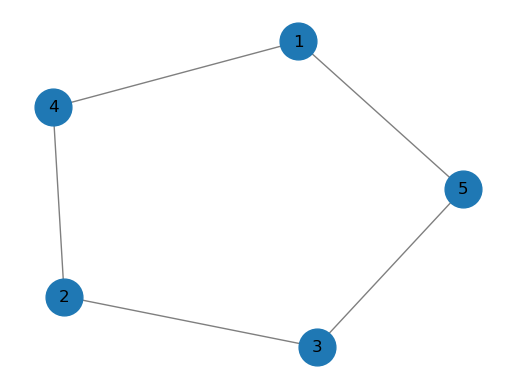

In [38]:
graph = Graph(init_num_nodes=5, init_num_edges=1)
graph.graph_visualize()
# set weight in __randomly_connect_all_nodes and add_edge_to_graph